# Загрузка необходимых библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [12]:
def Modelling(X, y):
    """ Функция принимает Х - данные с информацией о ресторанах, 
        у - целевая переменная (рейтинги ресторанов).
        Далее разбивает данные на тренировочную и тестовую выборку,
        Создаёт модель RandomForestRegressor и обучает её на тренировочной выборке.
        Использует полученную модель для предсказания и выводит значение 
        метрики MAE Mean Absolute Error (MAE), которая показывает среднее отклонение 
        предсказанных значений от фактических. Также строит распределение 10 самых значимых
        признаков для модели
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42)
    regr = RandomForestRegressor(n_estimators=100)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

    feat_imoprtances = pd.Series(regr.feature_importances_, index=X.columns)
    feat_imoprtances.nlargest(10).plot(kind='barh')

# Моделирование

## Итерация 1

In [3]:
df = pd.read_csv('iteration#1.csv')
df.head(3)

,Ranking,Rating,Number of Reviews
0,5570.0,3.5,194.0
1,1537.0,4.0,10.0
2,353.0,4.5,688.0


In [4]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Rating'], axis=1)  # iteration#1
y = df['Rating']

Построим матрицу корреляций

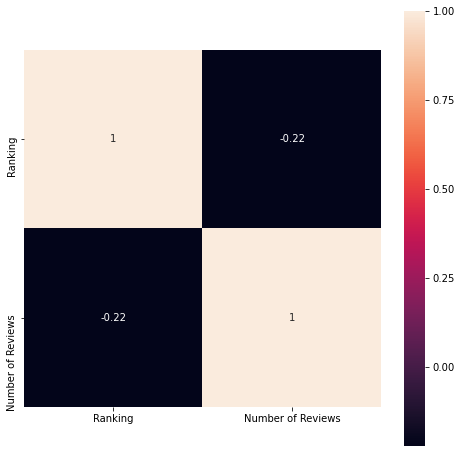

In [5]:
plt.figure(figsize=(8, 8))
sns.heatmap(X.corr(), annot=True, square=True)

Карта показывает, что между переменными существует слабая отрицательная (-0.22) связь. Это, возможно, говорит о том, что при увеличении количества отзывов [Number of Reviews] для ресторана его рейтинг среди ресторанов города [Ranking] падает. Возможно, прирост отзывов происходит в большинстве за счёт негативных отзывов.  

MAE: 0.4251747793831169


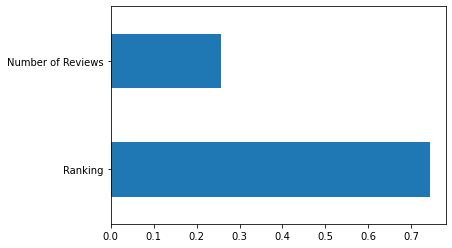

In [11]:
Modelling(X, y)

Результат по метрике MAE = 0.4251. Из распределения значимости признаков следует, что [Ranking] более значим для модели, нежели [Number of Reviews]. 

## Итерация 2 

In [14]:
df = pd.read_csv('iteration#2.csv')
df.head(3)

,Ranking,Rating,Number of Reviews,Price,City Part,City Ranking 1,City Ranking 2,Cuisine Norm,Days,Dif Days
0,5570.0,3.5,194.0,1,0.122425,-0.016828,0.076333,0.003021,120.0,1440.0
1,1537.0,4.0,10.0,1,0.020500,-0.017947,0.008842,-0.012979,107.0,965.0
2,353.0,4.5,688.0,2,0.143925,0.135123,0.129360,0.035021,308.0,627.0


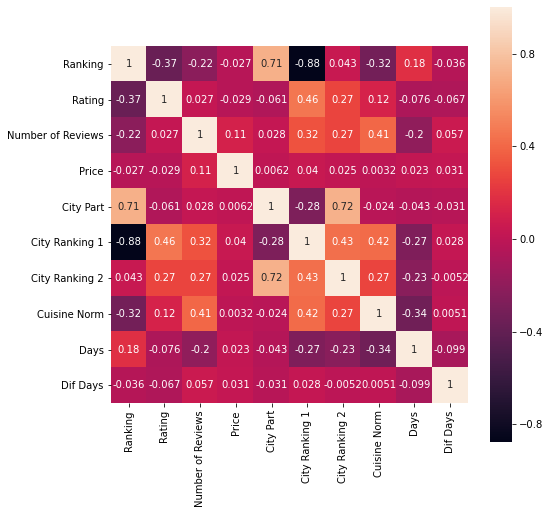

In [15]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, square=True)

Из тепловой карты корреляций можно сделать вывод, что [Ranking] имеет довольно сильную отрицательную линейную связь с [City Ranking 1] (-0.88) и положительную с [City Part] (0.71), на основании чего исключим [Ranking] из модели. 

In [18]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Rating'], axis=1)  # iteration#2
y = df['Rating']

MAE: 0.210062


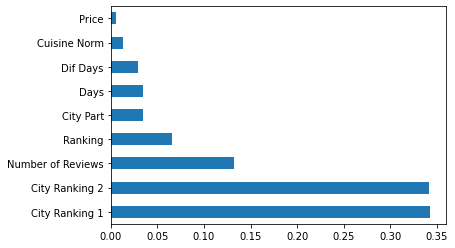

In [19]:
Modelling(X, y)

In [ ]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Rating', 'Ranking'], axis=1)  # iteration#2
y = df['Rating']

MAE: 0.20996899999999996


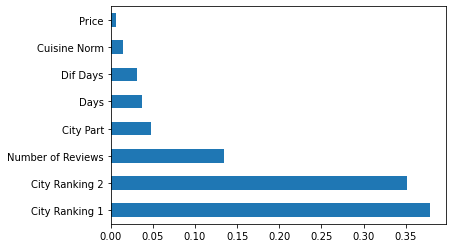

In [17]:
Modelling(X, y)

Проведенные расчёты с исключением [Ranking] показывают, что это показатель не влияет на качество. Среди всех добавленных в модель пременных наиболее значимыми являются [City Ranking 1,2] и [City Part]. 

Неожиданно малое значение важности у показателя [Price]. 

## Итерация 3

Загрузим полученные dummy variables для [City].
Посмотрим на максимальные и минимальные внедиагональные значения матрицы корреляций новых признаков:

max = -0.004925087550283137; min = -0.1531458197251131


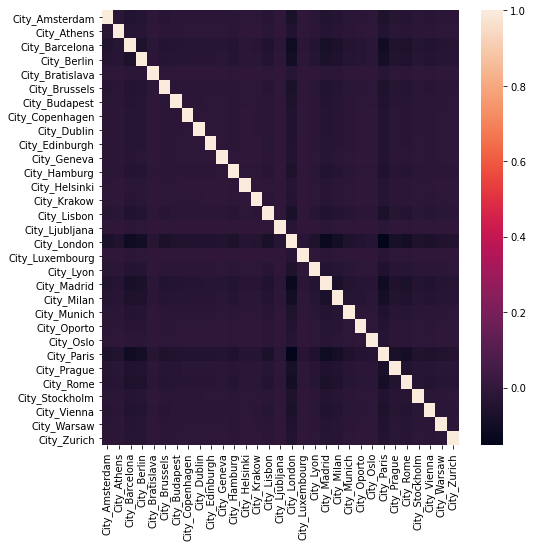

In [21]:
city_dummy = pd.read_csv('city_dummy.csv')
array = city_dummy.corr().to_numpy()
maximum = array[array < 1].max()
minimum = array.min()
print('max = ', maximum, '; min = ', minimum, sep='')
plt.figure(figsize=(8, 8))
sns.heatmap(city_dummy.corr())

Как видно из карты корреляций, все значения отрицательные, максимальное по модулю значение 0.153, что говорит о возможной слабой линейной зависимости переменных. Загрузим данные из предыдущего шага (iteration#2) и посмотрим на их корреляцию с новыми признаками.  

In [22]:
df = pd.read_csv('iteration#2.csv')

In [23]:
df = pd.concat([df, city_dummy], axis=1)

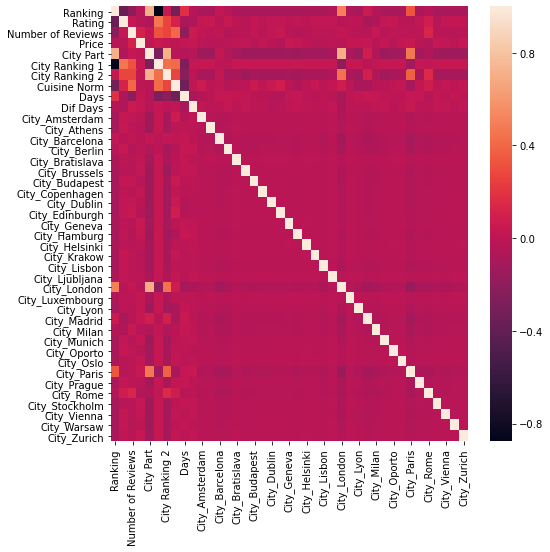

In [24]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr())

Как и ранее, исключим признак [Ranking], а также признак [City_London] из-за его значительной (0.7) корреляции с [City Part]

In [25]:
df['City_London'].corr(df['City Part'])

0.702602781833127

In [25]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Rating', 'Ranking', 'City_London'], axis=1)  # iteration#3
y = df['Rating']

MAE: 0.20748199999999997


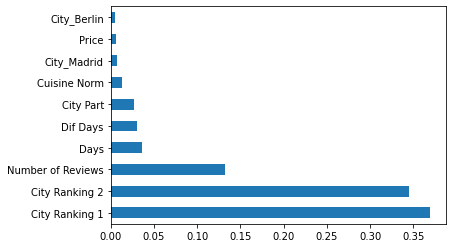

In [26]:
Modelling(X, y)

Добавление dummy variables, построенных по [City], позволило немного улучшить результат (0.20748 против 0.20996) Стоит также отметить, что [City Part] стал менее значим для модели. Самым значимым из новых признаков является [City Madrid], но его влияние невелико (около 2%) 

## Итерация 4

Загрузим полученные dummy variables для [Cuisine Style]
Посмотрим на максимальные и минимальные внедиагональные значения матрицы корреляций новых признаков:

In [27]:
cuisine_dummy = pd.read_csv('cuisine_dummy.csv')
array = cuisine_dummy.corr().to_numpy()
maximum = array[array < 1].max()
minimum = array.min()
print('max = ', maximum, '; min = ', minimum, sep='')

max = 0.6959304436101553; min = -0.14944063648168138


Имеем наибольшее по модулю значение 0.695, что говорит об умеренной корреляции небольшого количества признаков. Как видно из тепловой карты, подавляющее большинство признаков имеет слабую отрицательную связь. 

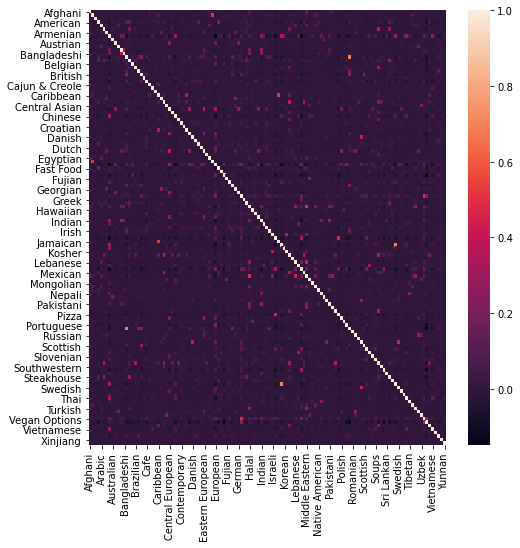

In [28]:
plt.figure(figsize=(8, 8))
sns.heatmap(cuisine_dummy.corr())

Загрузим данные из предыдущего шага (iteration#2) и посмотрим на их корреляцию с новыми признаками. Убрав заведомо сильно коррелирующие переменные [Rating] и [Ranking]

max = 0.7166891901379646; min = -0.33981199245615384


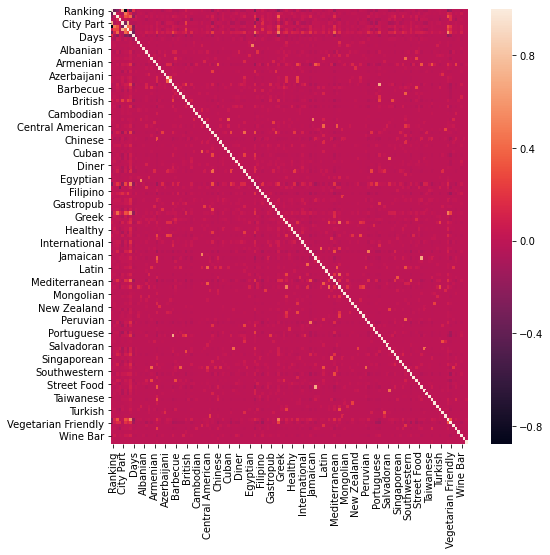

In [32]:
df = pd.read_csv('iteration#2.csv')
df = pd.concat([df, cuisine_dummy], axis=1)
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr())
array = df.drop(['Rating', 'Ranking'], axis=1).corr().to_numpy()
maximum = array[array < 1].max()
minimum = array.min()
print('max = ', maximum, '; min = ', minimum, sep='')

In [33]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Rating', 'Ranking'], axis=1)  # iteration#4
y = df['Rating']

MAE: 0.2084825


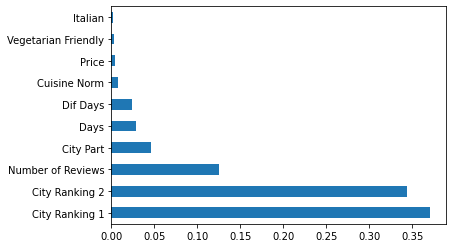

In [34]:
Modelling(X, y)

Добавление dummy variables, построенных по [Cuisine Style], позволило немного улучшить результат (0.20848 против 0.20996 без dummy variables). Самым значимым из новых признаков является [Vegetarian Friendly], но его влияние невелико (менее 1%) 

## Итерация 5

Наконец, попробуем объединить все прошлые данные, убрав заведомо сильно коррелирующие переменные [Rating] и [Ranking], [City_London]

In [39]:
city_dummy = pd.read_csv('city_dummy.csv')
cuisine_dummy = pd.read_csv('cuisine_dummy.csv')
df = pd.read_csv('iteration#2.csv')
df = pd.concat([df, cuisine_dummy, city_dummy], axis=1)
array = df.drop(['Rating', 'Ranking'], axis=1).corr().to_numpy()
maximum = array[array < 1].max()
minimum = array.min()
print('max = ', maximum, '; min = ', minimum, sep='')

max = 0.7166891901379646; min = -0.33981199245615384


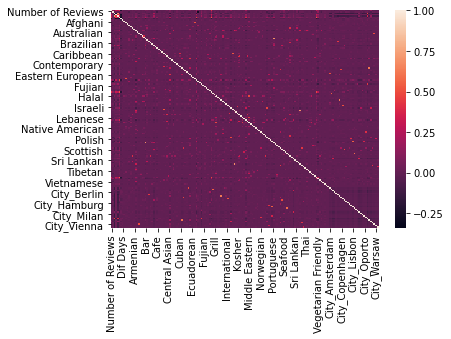

In [38]:
sns.heatmap(df.drop(['Rating', 'Ranking', 'City_London'], axis=1).corr())

In [36]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Rating', 'Ranking', 'City_London'], axis=1)  # iteration#4
y = df['Rating']

MAE: 0.2061555


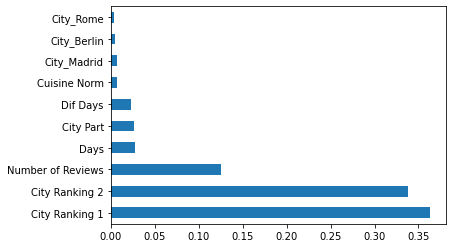

In [37]:
Modelling(X, y)

Добавление dummy variables, построенных по [Cuisine Style] и [City], позволило немного улучшить результат (0.20615 против 0.20996 без dummy variables). Самым значимым из новых признаков является [City Madrid], но его влияние невелико (менее 1%) 

# Итоги

Использование числовых переменных [Number of Reviews] и [Ranking] содержащихся в изначальном датасете без какой-либо дополнительной обработки дало результат по метрике MAE = **0.425**. 

Дальнейшая попытка улучшить результат была связана с генерацией новых признаков: 
[Price], [City Part], [City Ranking 1], [City Ranking 2], [Cuisine Norm], [Days] и [Dif Days]. Отметим, что  [Days], [Dif Days] и [City Ranking 2] были построены с привлечением внешних данных. 

Добавленные признаки позволили существенно улучшить результат до MAE = **0.21**. Ннаиболее важными среди добавленных признаков для модели стали [City Ranking 1,2] (35%) и [City Part] (4%).

Следующим этапом улучшения результатов моделирования стал этап добавления dummy variables к новым признакам. Было рассмотрено три варианта: 1 - dummy variables, построенных по [City], 2 - dummy variables, построенных по [Cuisine Style], 3 - объединение 1 и 2. 

Все три варианта привели к улучшению результатов и показали следующие значения метрики MAE: 

1: **0.20748**; 2: **0.20848**;  3: **0.20615**

Последний вариант был признан лучшим и использовался для участия в соревновании на Kaggle. 